# **PROBLEM STATEMENT**

Chennai house sale price data is shared here, we are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses.


# **DATA CLEANING**

**WE START WITH IMPORTING THE REQUIRED PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')



**UPLOAD THE DATASET**



In [ ]:
chennaiHouse=pd.read_csv("train-chennai-sale.csv")
chennaiHouse.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**LIST ALL THE FEATURES AND THEIR DATATYPES**


In [ ]:
chennaiHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**CHECK FOR NULL VALUES**

In [ ]:
chennaiHouse.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**NULL VALUES ARE DROPPED AS THEY ARE LESS IN NUMBER**

In [ ]:
chennaiHouse=chennaiHouse.dropna()
chennaiHouse.shape

(7056, 22)

**FOR EACH DISCRETE FEATURE UNIQUE VALUES ARE LISTED AND SPELLING MISTAKES ARE RECTIFIED**

In [ ]:
chennaiHouse.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
chennaiHouse['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [ ]:
chennaiHouse['AREA'].replace("Karapakam","Karapakkam",inplace=True)
chennaiHouse['AREA'].replace("KKNagar","KK Nagar",inplace=True)
chennaiHouse['AREA'].replace("Ann Nagar","Anna Nagar",inplace=True)
chennaiHouse['AREA'].replace("Ana Nagar","Anna Nagar",inplace=True)
chennaiHouse['AREA'].replace("Adyr","Adyar",inplace=True)
chennaiHouse['AREA'].replace("Chrompt","Chrompet",inplace=True)
chennaiHouse['AREA'].replace("Chrmpet","Chrompet",inplace=True)
chennaiHouse['AREA'].replace("Chormpet","Chrompet",inplace=True)
chennaiHouse['AREA'].replace("TNagar","T Nagar",inplace=True)
chennaiHouse['AREA'].replace("Velchery","Velachery",inplace=True)
chennaiHouse['AREA'].value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

In [ ]:
chennaiHouse['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
chennaiHouse['SALE_COND'].replace("Adj Land","AdjLand",inplace=True)
chennaiHouse['SALE_COND'].replace("Ab Normal","AbNormal",inplace=True)
chennaiHouse['SALE_COND'].replace("Partiall","Partial",inplace=True)
chennaiHouse['SALE_COND'].replace("PartiaLl","Partial",inplace=True)
chennaiHouse['SALE_COND'].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

In [ ]:
chennaiHouse['PARK_FACIL'].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [ ]:
chennaiHouse['PARK_FACIL'].replace("Noo","No",inplace=True)
chennaiHouse['PARK_FACIL'].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

In [ ]:
chennaiHouse['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
chennaiHouse['BUILDTYPE'].replace("Other","Others",inplace=True)
chennaiHouse['BUILDTYPE'].replace("Comercial","Commercial",inplace=True)
chennaiHouse['BUILDTYPE'].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

In [ ]:
chennaiHouse['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
chennaiHouse['UTILITY_AVAIL'].replace("All Pub","AllPub",inplace=True)
chennaiHouse['UTILITY_AVAIL'].value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
chennaiHouse['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
chennaiHouse['STREET'].replace("Pavd","Paved",inplace=True)
chennaiHouse['STREET'].replace("NoAccess","No Access",inplace=True)
chennaiHouse['STREET'].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

In [ ]:
chennaiHouse['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [ ]:
chennaiHouse['INT_SQFT'].describe()

count    7056.000000
mean     1381.316752
std       457.860850
min       500.000000
25%       991.000000
50%      1369.500000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [ ]:
chennaiHouse['SALES_PRICE'].describe()

count    7.056000e+03
mean     1.088801e+07
std      3.769081e+06
min      2.156875e+06
25%      8.266790e+06
50%      1.031922e+07
75%      1.298148e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [ ]:
chennaiHouse['DIST_MAINROAD'].describe()

count    7056.000000
mean       99.569161
std        57.403870
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [ ]:
chennaiHouse['QS_ROOMS'].describe()

count    7056.000000
mean        3.517177
std         0.892141
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [ ]:
chennaiHouse['QS_BATHROOM'].describe()

count    7056.000000
mean        3.505896
std         0.897644
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

In [ ]:
chennaiHouse['QS_BEDROOM'].describe()

count    7056.000000
mean        3.485332
std         0.886814
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

**FEATURES-NO OF BEDROOMS AND NO OF BATHROOMS ARE CHANGED TO INT DATATYPE**

In [ ]:
chennaiHouse['N_BEDROOM']=chennaiHouse['N_BEDROOM'].astype(int)
chennaiHouse['N_BEDROOM'].describe()

count    7056.000000
mean        1.636621
std         0.803633
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
chennaiHouse['N_BATHROOM']=chennaiHouse['N_BATHROOM'].astype(int)
chennaiHouse['N_BATHROOM'].describe()

count    7056.000000
mean        1.213152
std         0.409563
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [ ]:
chennaiHouse['N_ROOM'].describe()

count    7056.000000
mean        3.686650
std         1.020011
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [ ]:
chennaiHouse['QS_OVERALL'].describe()

count    7056.000000
mean        3.503389
std         0.527313
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [ ]:
chennaiHouse['REG_FEE'].describe()

count      7056.000000
mean     376791.852608
std      143109.581793
min       71177.000000
25%      272117.500000
50%      349444.500000
75%      451030.500000
max      983922.000000
Name: REG_FEE, dtype: float64

In [ ]:
chennaiHouse['COMMIS'].describe()

count      7056.000000
mean     140994.273384
std       78774.465963
min        5055.000000
25%       84212.750000
50%      127640.500000
75%      184449.000000
max      495405.000000
Name: COMMIS, dtype: float64

**DATE_BUILD AND DATE_SALE ARE CONVERTED TO DATETIME AND NEW COLUMNS YEAR_SOLD AND YEAR_BUILT ARE CREATED FOR CONVENIENCE**

In [ ]:
chennaiHouse.DATE_BUILD=pd.to_datetime(chennaiHouse['DATE_BUILD'])
chennaiHouse.DATE_SALE=pd.to_datetime(chennaiHouse['DATE_SALE'])
chennaiHouse['YEAR_SOLD']=pd.DatetimeIndex(chennaiHouse['DATE_SALE']).year
chennaiHouse['YEAR_BUILT']=pd.DatetimeIndex(chennaiHouse['DATE_BUILD']).year
chennaiHouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int64         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int64         
 5   N_BEDROOM      7056 non-null   int64         
 6   N_BATHROOM     7056 non-null   int64         
 7   N_ROOM         7056 non-null   int64         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  MZZONE         7056 non-null   object        
 15  QS_ROOMS       7056 n

In [ ]:
chennaiHouse.shape

(7056, 24)

**DATE_BUILD AND DATE_SALE ARE DROPPED**

In [ ]:
chennaiHouse=chennaiHouse.drop(['DATE_BUILD','DATE_SALE'],axis=1)
chennaiHouse.shape

(7056, 22)

**BUILDING AGE IS CALCULATED TO CORRELATE WITH SALES PRICE**

In [ ]:
chennaiHouse['BUILDING_AGE']=2022-chennaiHouse['YEAR_BUILT']
chennaiHouse['BUILDING_AGE'].describe()

count    7056.000000
mean       36.507653
std        12.649534
min        12.000000
25%        26.000000
50%        36.000000
75%        46.000000
max        73.000000
Name: BUILDING_AGE, dtype: float64

# **EDA**

**CORRELATION OF FEATURES WITH TARGET VARIABLE SALES_PRICE**
*   INT_SQFT
*   N_ROOM 
are evidently linear with target variable SALES PRICE



In [ ]:
chennaiHouse.corr()['SALES_PRICE']

INT_SQFT         0.612668
DIST_MAINROAD    0.018062
N_BEDROOM        0.332595
N_BATHROOM       0.110984
N_ROOM           0.603417
QS_ROOMS         0.022278
QS_BATHROOM     -0.012346
QS_BEDROOM       0.020079
QS_OVERALL       0.020352
REG_FEE          0.878274
COMMIS           0.627277
SALES_PRICE      1.000000
YEAR_SOLD        0.000696
YEAR_BUILT       0.117513
BUILDING_AGE    -0.117513
Name: SALES_PRICE, dtype: float64

In [ ]:
chennaiHouse

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILT,BUILDING_AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,55
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,27
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,30
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,34
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962,60
7105,P10000,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995,27
7106,P09594,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978,44
7107,P06508,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977,45


**AREA GRAPH**



From the data we can observe that 


*   In Chrompet,Karapakkam,KK Nagar more number of houses were sold
*   Chrompet, Anna Nagar top the Costly Areas,KK Nagar is in the bottom of the list
*   In KK Nagar, Velachery houses sold were big compared to other areas
*   Average building age of sold houses is more in Velachery and less in KK Nagar, Chrompet
*   Income generated from sale of different types of houses was more in TNagar,Anna Nagar and KK Nagar.

Since there is no clear picture of hierarchy we prefer one hot encoding


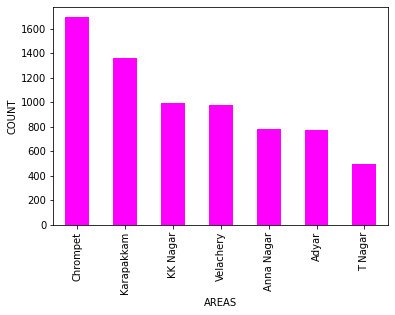

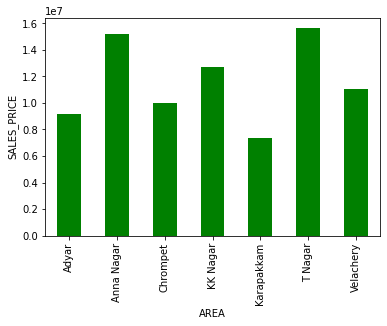

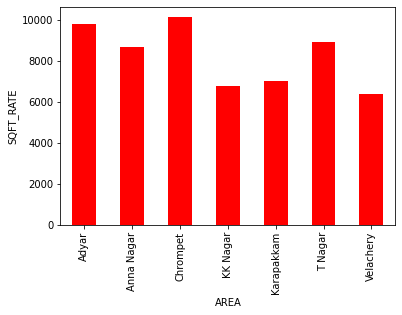

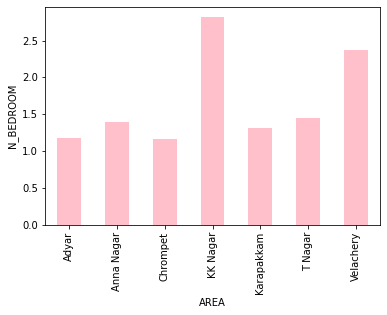

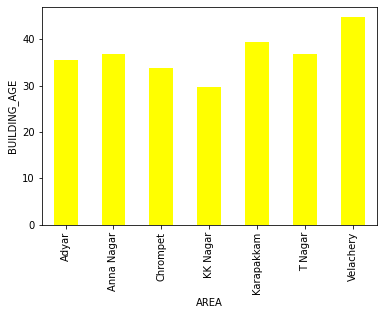

In [ ]:
chennaiHouse['AREA'].value_counts().plot(kind='bar',color='magenta')
plt.title='AREAS DISTRIBUTION'
plt.xlabel('AREAS')
plt.ylabel('COUNT')
plt.show()

plt.title='AREA Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('AREA')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('AREA')
plt.ylabel("SALES_PRICE")
plt.show()

newdata['SQFT_RATE']=newdata['SALES_PRICE']/newdata['INT_SQFT']
newdata.groupby('AREA')['SQFT_RATE'].mean().plot(kind='bar',color='red')
plt.xlabel('AREA')
plt.ylabel("SQFT_RATE")
plt.show()
newdata.groupby('AREA')['N_BEDROOM'].mean().plot(kind='bar',color='PINK')
plt.xlabel('AREA')
plt.ylabel("N_BEDROOM")
plt.show()
newdata.groupby('AREA')['BUILDING_AGE'].mean().plot(kind='bar',color='YELLOW')
plt.xlabel('AREA')
plt.ylabel("BUILDING_AGE")
plt.show()

**SALE CONDITION**
There is very very slight linear pattern in Sale Condition.


So, we are doing one hot encoding for this feature



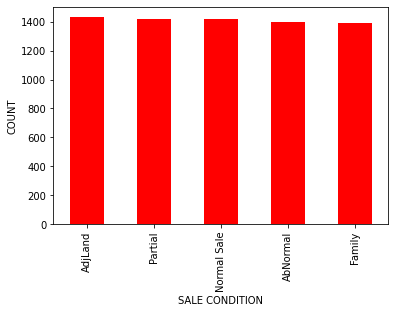

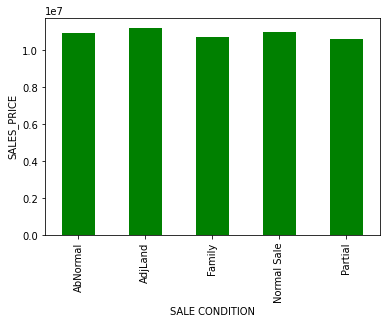

In [ ]:
chennaiHouse['SALE_COND'].value_counts().plot(kind='bar',color='red')
plt.title='SALE CONDITION DISTRIBUTION'
plt.xlabel('SALE CONDITION')
plt.ylabel('COUNT')
plt.show()

plt.title='SALE CONDITION Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('SALE_COND')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('SALE CONDITION')
plt.ylabel("SALES_PRICE")
plt.show()

**PARKING FACILITY**
* Sale Prices of houses with Parking Facility were more.


We do label encoding as we can see preference for parking than no parking facility

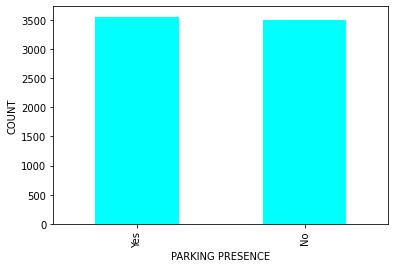

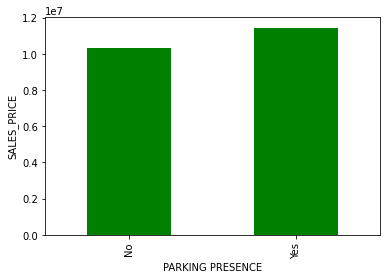

In [ ]:
chennaiHouse['PARK_FACIL'].value_counts().plot(kind='bar',color='cyan')
plt.title='PARKING FACILITY DISTRIBUTION'
plt.xlabel('PARKING PRESENCE')
plt.ylabel('COUNT')
plt.show()

plt.title='PARKING PRESENCE Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('PARKING PRESENCE')
plt.ylabel("SALES_PRICE")
plt.show()

**BUILDING TYPE**
* Commercial buildings have more Sale Price
* Residential and others are having less Sale Price
* There is no linear relationship as there is steep increase for commercial

We do one hot encoding

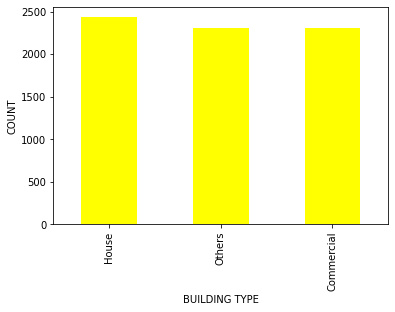

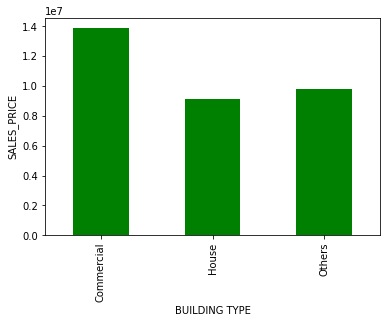

In [ ]:
chennaiHouse['BUILDTYPE'].value_counts().plot(kind='bar',color='yellow')
plt.title='BUILDINGTYPE DISTRIBUTION'
plt.xlabel('BUILDING TYPE')
plt.ylabel('COUNT')
plt.show()

plt.title='BUILDING TYPE Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('BUILDTYPE')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('BUILDING TYPE')
plt.ylabel("SALES_PRICE")
plt.show()

**UTILITIES AVAILABLE**
* There is no linear relation between the feature and the Sale Price as most of the houses are having almost all utilities.

We do one hot encoding

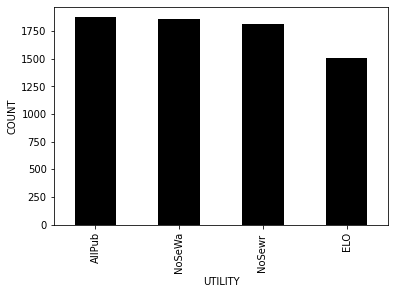

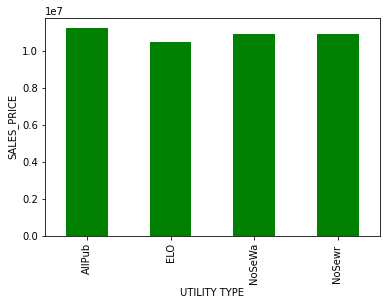

In [ ]:
chennaiHouse['UTILITY_AVAIL'].value_counts().plot(kind='bar',color='black')
plt.title='UTILITY DISTRIBUTION'
plt.xlabel('UTILITY')
plt.ylabel('COUNT')
plt.show()

plt.title='UTILITY Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('UTILITY TYPE')
plt.ylabel("SALES_PRICE")
plt.show()

**STREET TYPE**


There is a linear relation between Street Type and Sale Price.
The order is

*   Gravel
*   Paved
*   NoAccess

We do label encoding





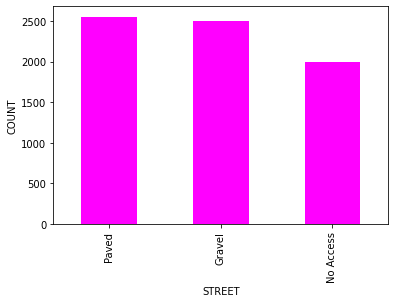

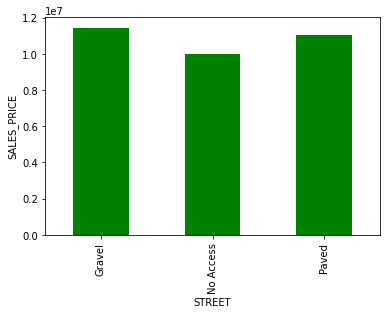

In [ ]:
chennaiHouse['STREET'].value_counts().plot(kind='bar',color='magenta')
plt.title='STREET DISTRIBUTION'
plt.xlabel('STREET')
plt.ylabel('COUNT')
plt.show()

plt.title='STREET Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('STREET')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('STREET')
plt.ylabel("SALES_PRICE")
plt.show()

**MZZONE**


The sale count and Sale Price is high in Residential Zones than in Agricultural,Commercial and Industrial.
We can see a linear relation with Sale Price so label encoding is done

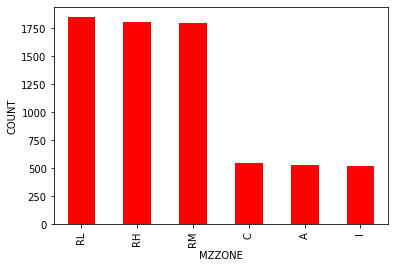

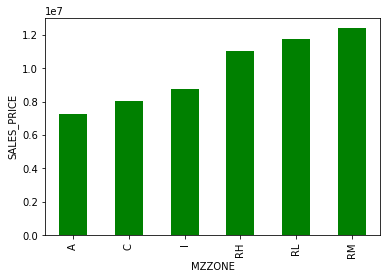

In [ ]:
chennaiHouse['MZZONE'].value_counts().plot(kind='bar',color='red')
plt.title='MZZONE DISTRIBUTION'
plt.xlabel('MZZONE')
plt.ylabel('COUNT')
plt.show()

plt.title='MZZONE Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('MZZONE')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('MZZONE')
plt.ylabel("SALES_PRICE")
plt.show()

**INT_SQFT**

We can see linear relation between Square Feet and Sale Price.
The number of houses sold is more between 500 to 2000 sq ft range. Above 2000 sqft the sale count is less.

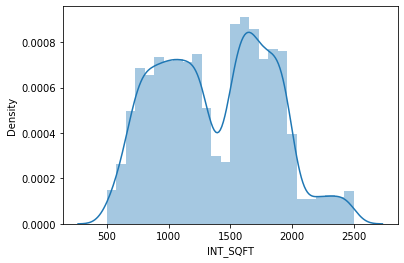

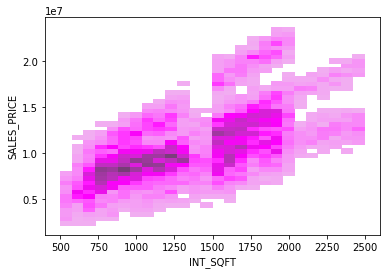

In [ ]:
sns.distplot(chennaiHouse['INT_SQFT'],kde=True)
plt.show()
sns.histplot(x=chennaiHouse['INT_SQFT'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**BUILDING AGE**


People prefer to buy houses of age less than 50 years. The sale price is also in a slightly decreasing mode from new to old houses.

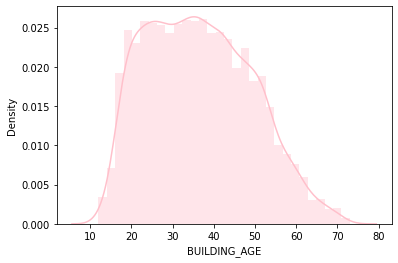

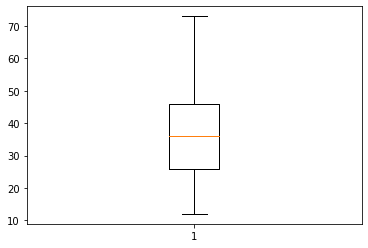

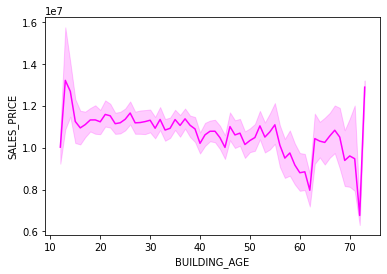

In [ ]:
sns.distplot(chennaiHouse['BUILDING_AGE'],kde=True,color='pink')
plt.show()
plt.boxplot(chennaiHouse['BUILDING_AGE'])
plt.show()
sns.lineplot(x=chennaiHouse['BUILDING_AGE'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**DISTANCE FROM MAIN ROAD**

The distance of house from main road is not showing much relation with the Sale Price

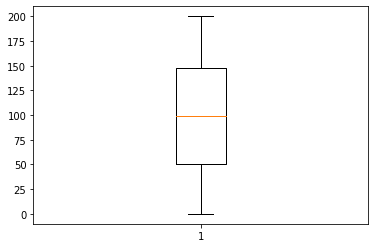

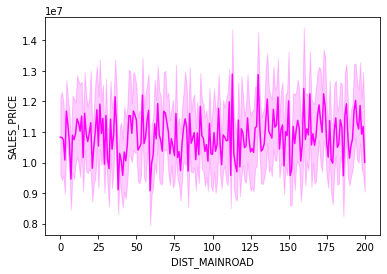

In [ ]:
plt.boxplot(chennaiHouse['DIST_MAINROAD'])
plt.show()
sns.lineplot(x=chennaiHouse['DIST_MAINROAD'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**NUMBER OF BED ROOM**

The Sale Price is in linear relation with number of bedrooms but the number of  people buying single and double bedroom houses is more.

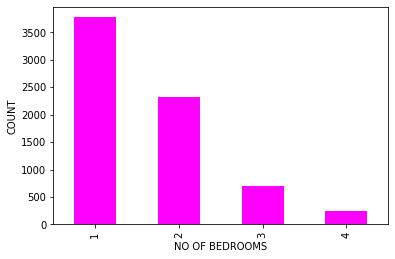

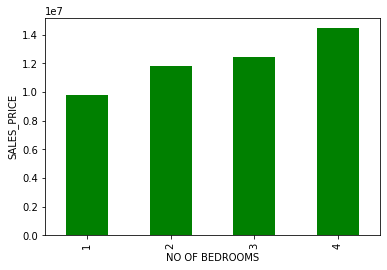

In [ ]:
chennaiHouse['N_BEDROOM'].value_counts().plot(kind='bar',color='magenta')
plt.title='N_BEDROOM DISTRIBUTION'
plt.xlabel('NO OF BEDROOMS')
plt.ylabel('COUNT')
plt.show()

plt.title='N_BEDROOM Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('N_BEDROOM')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('NO OF BEDROOMS')
plt.ylabel("SALES_PRICE")
plt.show()

**NO OF BATHROOMS**

The Sale Price of 2 Bathroom facility houses is more than single ones.
Since the number of people buying single bedroom houses is more we can see that the purchase of single bathroom houses is more.

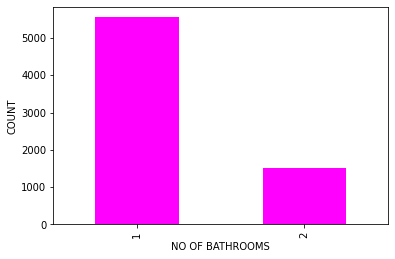

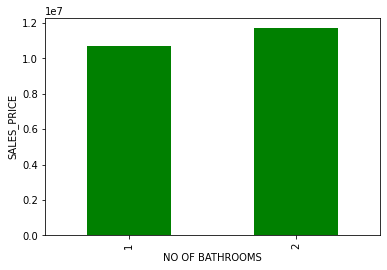

In [ ]:
chennaiHouse['N_BATHROOM'].value_counts().plot(kind='bar',color='magenta')
plt.title='N_BATHROOM DISTRIBUTION'
plt.xlabel('NO OF BATHROOMS')
plt.ylabel('COUNT')
plt.show()

plt.title='N_BATHROOM Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('N_BATHROOM')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('NO OF BATHROOMS')
plt.ylabel("SALES_PRICE")
plt.show()

**NO OF ROOMS**

The number of rooms and Sale Price is linearly related.


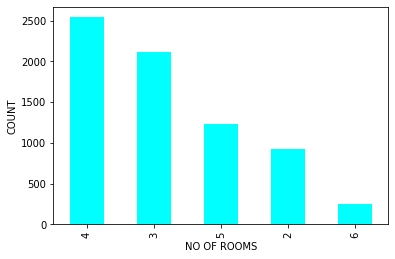

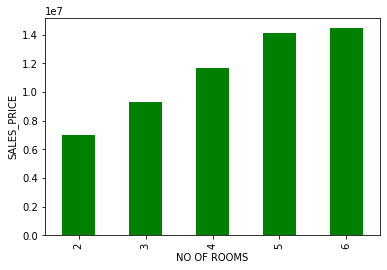

In [ ]:
chennaiHouse['N_ROOM'].value_counts().plot(kind='bar',color='CYAN')
plt.title='N_ROOM DISTRIBUTION'
plt.xlabel('NO OF ROOMS')
plt.ylabel('COUNT')
plt.show()

plt.title='N_ROOM Vs SALEPRICE'
newdata=chennaiHouse.copy()
newdata.groupby('N_ROOM')['SALES_PRICE'].mean().plot(kind='bar',color='green')
plt.xlabel('NO OF ROOMS')
plt.ylabel("SALES_PRICE")
plt.show()

**QS_ROOMS**

There is not much relation between QS_ROOMS and Sale Price.

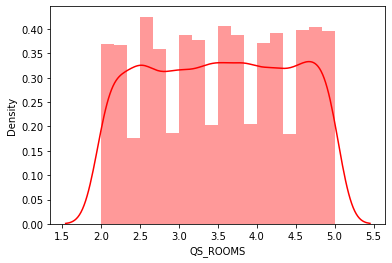

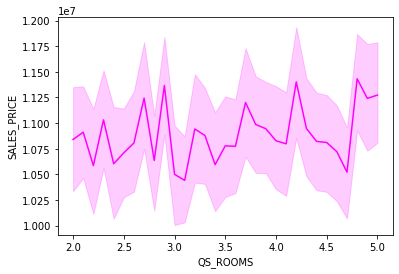

In [ ]:
sns.distplot(chennaiHouse['QS_ROOMS'],kde=True,color='RED')
plt.show()
sns.lineplot(x=chennaiHouse['QS_ROOMS'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**QS_BATHROOM**

There is not much relation between QS_BATHROOM and Sale Price

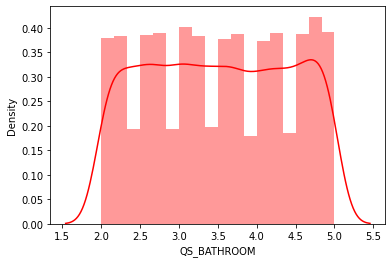

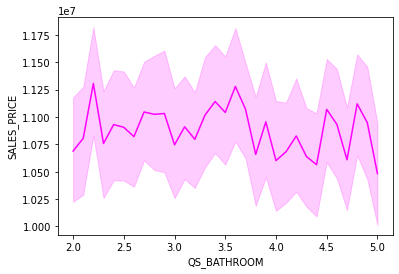

In [ ]:
sns.distplot(chennaiHouse['QS_BATHROOM'],kde=True,color='RED')
plt.show()
sns.lineplot(x=chennaiHouse['QS_BATHROOM'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**QS_BEDROOM**

There is not much relation between QS_BEDROOM and Sale Price

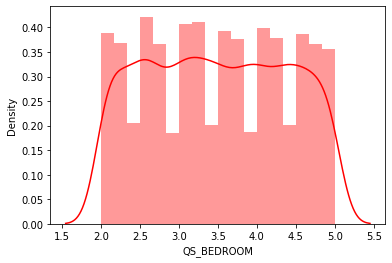

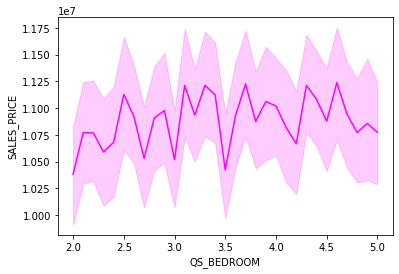

In [ ]:
sns.distplot(chennaiHouse['QS_BEDROOM'],kde=True,color='RED')
plt.show()
sns.lineplot(x=chennaiHouse['QS_BEDROOM'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**QS_OVERALL**

There is not much relation between QS_OVERALL and Sale Price

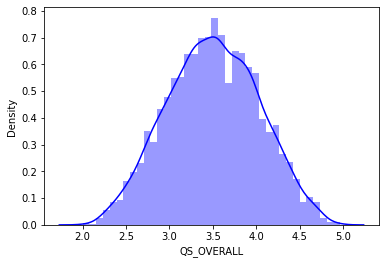

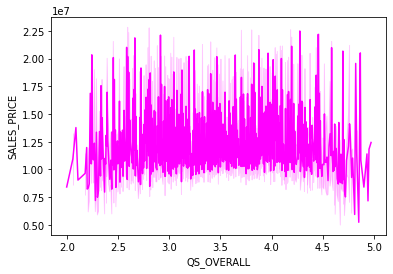

In [ ]:
sns.distplot(chennaiHouse['QS_OVERALL'],kde=True,color='blue')
plt.show()
sns.lineplot(x=chennaiHouse['QS_OVERALL'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**YEAR SOLD**

The Sale_Price is increasing with year but during inflation ie around year 2010 the price dropped. Due to drop in price people could afford and bought more houses.



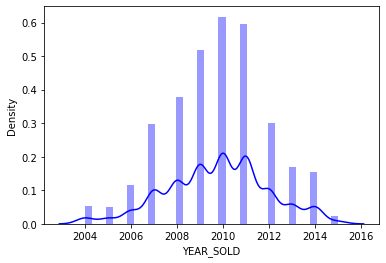

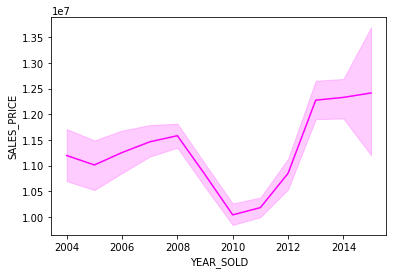

In [ ]:
sns.distplot(chennaiHouse['YEAR_SOLD'],kde=True,color='blue')
plt.show()
sns.lineplot(x=chennaiHouse['YEAR_SOLD'],y=chennaiHouse['SALES_PRICE'],color='magenta')
plt.show()

**SALE PRICES**

The number of people buying medium price range houses is more than high price houses.

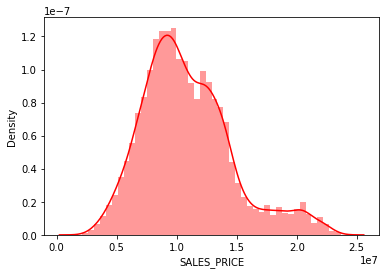

In [ ]:
sns.distplot(chennaiHouse['SALES_PRICE'],kde=True,color='RED')

# **ENCODING**

In [ ]:
chennaiHouse.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'YEAR_SOLD', 'YEAR_BUILT', 'BUILDING_AGE'],
      dtype='object')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
newchennai=chennaiHouse.copy()
newchennai['LE_PARK_FACIL']=label_encoder.fit_transform(newchennai['PARK_FACIL'])
newchennai['LE_PARK_FACIL']
newchennai[['PARK_FACIL','LE_PARK_FACIL']]

,PARK_FACIL,LE_PARK_FACIL
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,Yes,1
...,...,...
7104,No,0
7105,Yes,1
7106,No,0
7107,Yes,1


In [ ]:
newchennai['LE_STREET']=newchennai.STREET.map({'No Access':0,'Paved':1,'Gravel':2})


In [ ]:
newchennai['LE_MZZONE']=label_encoder.fit_transform(newchennai['MZZONE'])


**DROP UNNECESSARY AND REPEATED COLUMNS**

In [ ]:
newchennai=newchennai.drop(columns=['PRT_ID','YEAR_SOLD','YEAR_BUILT','REG_FEE','COMMIS','DIST_MAINROAD','QS_OVERALL','PARK_FACIL','MZZONE','STREET'])
newchennai.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'BUILDTYPE', 'UTILITY_AVAIL', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'SALES_PRICE', 'BUILDING_AGE', 'LE_PARK_FACIL', 'LE_STREET',
       'LE_MZZONE'],
      dtype='object')

In [ ]:
newchennai1=pd.get_dummies(newchennai)
newchennai1.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'BUILDING_AGE',
       'LE_PARK_FACIL', 'LE_STREET', 'LE_MZZONE', 'AREA_Adyar',
       'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar', 'AREA_Karapakkam',
       'AREA_T Nagar', 'AREA_Velachery', 'SALE_COND_AbNormal',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO',
       'UTILITY_AVAIL_NoSeWa', 'UTILITY_AVAIL_NoSewr '],
      dtype='object')

# **SPLITTING**

**SPLITTING INTO TRAIN AND TEST DATA**

In [ ]:
chennai=newchennai1.drop(columns=['SALES_PRICE'])
X=chennai.values
y=newchennai1['SALES_PRICE'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [ ]:
X_train.shape,X_test.shape

((5644, 30), (1412, 30))

In [ ]:
X_train

array([[1.261e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.094e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.001e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.195e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [9.470e+02, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.008e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
y_train

array([ 9653285,  7716505,  7078720, ..., 14684750, 14095950,  8836160])

# **SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)



# **MODELING**

**LINEAR REGRESSION**

In [ ]:
Lregressor=LinearRegression(fit_intercept=True)
Lregressor.fit(X_train_scale,y_train)

LinearRegression()

In [ ]:
print(Lregressor.intercept_)

10883522.86351939


In [ ]:
Lregressor.coef_

array([ 1.79926577e+06,  1.30093659e+05, -1.50852829e+05,  2.28355923e+05,
        1.42593542e+04,  2.17404746e+04,  3.28979142e+04, -2.42224382e+05,
        5.05276123e+05,  4.64254150e+05,  9.08402218e+05, -2.07563371e+17,
       -2.06098457e+17, -2.82073506e+17, -2.31941821e+17, -2.59445732e+17,
       -1.69063972e+17, -2.29041848e+17,  4.50981825e+16,  4.53710047e+16,
        4.49137642e+16,  4.57571684e+16,  4.55355120e+16,  2.00851540e+16,
        2.02990519e+16,  2.00962103e+16, -1.49206740e+17, -1.38904024e+17,
       -1.49016464e+17, -1.46645430e+17])

In [ ]:
y_pred=Lregressor.predict(X_test_scale)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(3)

,Actual,Predicted
0,7989570,8.028131e+06
1,14666960,1.457661e+07
2,12019000,1.257799e+07


In [ ]:
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
crossval=cross_val_score(Lregressor,X_train_scale,y_train)
print("LR_cross_val_score",crossval)
LR_MCVS=np.mean(crossval)
print("mean cross validation score: {}".format(LR_MCVS))


Mean Absolute Error 590374.7869068219
Mean Squared Error 629554898751.0427
LR_cross_val_score [0.95900488 0.95648218 0.95663764 0.95624285 0.95575158]
mean cross validation score: 0.9568238255928337


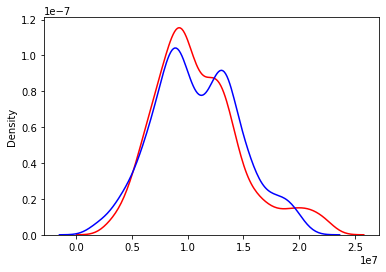

In [ ]:
ax1 = sns.distplot(y_test, hist = False, color = 'red', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'blue', label = 'prediction', ax = ax1)

**DECISION TREE**

In [ ]:
Dregressor = DecisionTreeRegressor(random_state=1)
Dregressor.fit(X_train_scale, y_train)
score = cross_val_score(Dregressor, X_test_scale, y_test,cv=5)
print('cross_val_score',score)
DT_MCVS=np.mean(score)
print("mean cross validation score: {}".format(DT_MCVS))


cross_val_score [0.91050743 0.91646875 0.92058405 0.94238962 0.91640526]
mean cross validation score: 0.9212710215463774


In [ ]:
dt_pred=Dregressor.predict(X_test_scale)
df1=pd.DataFrame({'Actual':y_test,'Predicted':dt_pred})
df1.head(3)

,Actual,Predicted
0,7989570,7740130.0
1,14666960,14256340.0
2,12019000,11584500.0


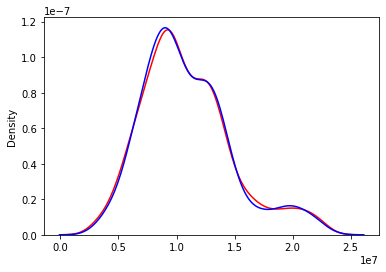

In [ ]:
ax3 = sns.distplot(y_test, hist = False, color = 'red', label = 'actual')
sns.distplot(dt_pred, hist = False, color = 'blue', label = 'prediction', ax = ax3)

**RANDOM FOREST**

In [ ]:
rf=RandomForestRegressor(n_estimators=200,random_state=9)
rf.fit(X_train_scale,y_train)
Rscore = cross_val_score(rf, X_test_scale, y_test,cv=15)
print('cross_val_score',Rscore)
RF_MCVS=np.mean(Rscore)
print("mean cross validation score: {}".format(RF_MCVS))

cross_val_score [0.97146005 0.96922217 0.96802763 0.94866577 0.96707815 0.97272387
 0.97014128 0.96731675 0.9669478  0.96741948 0.97341507 0.96301469
 0.9556885  0.96194604 0.9751855 ]
mean cross validation score: 0.9665501823240124


In [ ]:
rf_pred=rf.predict(X_test_scale)
df2=pd.DataFrame({'Actual':y_test,'Predicted':rf_pred})
df2.head(3)

,Actual,Predicted
0,7989570,8055527.50
1,14666960,14544762.90
2,12019000,11745648.55


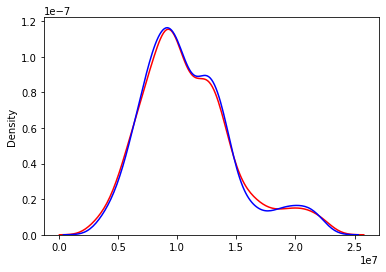

In [ ]:
ax2 = sns.distplot(y_test, hist = False, color = 'red', label = 'actual')
sns.distplot(rf_pred, hist = False, color = 'blue', label = 'prediction', ax = ax2)

**KNN**

In [ ]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train_scale,y_train)
knn_cv_score=cross_val_score(knn,X_test_scale,y_test,cv=10)
print('knn_cv_score',knn_cv_score)
KNN_MCVS=np.mean(knn_cv_score)
print("mean cross validation score: {}".format(KNN_MCVS))

knn_cv_score [0.8525222  0.87340326 0.84539641 0.86418791 0.84019237 0.85735586
 0.86003133 0.85119136 0.86508475 0.85868671]
mean cross validation score: 0.856805215907262


In [ ]:
knn_pred=knn.predict(X_test_scale)
df3=pd.DataFrame({'Actual':y_test,'Predicted':knn_pred})
df3.head(3)

,Actual,Predicted
0,7989570,9.669349e+06
1,14666960,1.289367e+07
2,12019000,1.368129e+07


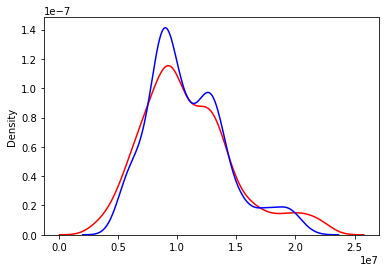

In [ ]:
ax3 = sns.distplot(y_test, hist = False, color = 'red', label = 'actual')
sns.distplot(knn_pred, hist = False, color = 'blue', label = 'prediction', ax = ax3)

**XGBOOST**

In [ ]:
XG_boost=xgb.XGBRegressor()
XG_boost.fit(X_train_scale,y_train)
xgb_cv_score=cross_val_score(XG_boost,X_test_scale,y_test)
print('xgb_cv_score',xgb_cv_score)
XG_MCVS=np.mean(xgb_cv_score)
print("mean cross validation score: {}".format(XG_MCVS))
xg_pred=XG_boost.predict(X_test_scale)

[08:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb_cv_score [0.98675231 0.98185698 0.98644271 0.98796723 0.98765011]
mean cross validation score: 0.9861338684426185


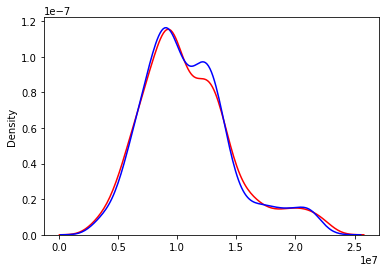

In [ ]:
ax4 = sns.distplot(y_test, hist = False, color = 'red', label = 'actual')
sns.distplot(xg_pred, hist = False, color = 'blue', label = 'prediction', ax = ax4)

**cross validation scores of all models**

In [ ]:
CVS={'LR_CVS':LR_MCVS,'DT_CVS':DT_MCVS,'RF_CVS':RF_MCVS,'XG_CVS':XG_MCVS,'KNN_CVS':KNN_MCVS}
print("cross validation scores")
CVS

cross validation scores


{'DT_CVS': 0.9212710215463774,
 'KNN_CVS': 0.856805215907262,
 'LR_CVS': 0.9568238255928337,
 'RF_CVS': 0.9665501823240124,
 'XG_CVS': 0.9861338684426185}

r2 of all models

In [ ]:
print('R2 Values')
R2={'LR_R2':metrics.r2_score(y_test,y_pred),'DT_R2':Dregressor.score(X_test_scale,y_test),'RF_R2':rf.score(X_test_scale,y_test),'XG_R2':XG_boost.score(X_test_scale,y_test),'KNN_R2':knn.score(X_test_scale,y_test)}
R2

R2 Values


{'DT_R2': 0.9659959733051698,
 'KNN_R2': 0.8897140706621136,
 'LR_R2': 0.9593652095187981,
 'RF_R2': 0.9860051078440369,
 'XG_R2': 0.9895058046286365}

According to Cross Validation Score XGboost got the highest score and
R2 is also highest for **XGboost Model**

#**MODEL FOR BUYER**


**XGBOOST IS THE BEST MODEL FOR PREDICTING HOUSE PRICE ACCORDING TO THE GIVEN DATA**





Sample predictions and actual values for XGBoost Model

In [ ]:
XGdf=pd.DataFrame({'Actual':y_test,'Predicted':xg_pred})
XGdf.head()

,Actual,Predicted
0,7989570,8131533.0
1,14666960,14842192.0
2,12019000,11929590.0
3,5890500,6304676.5
4,12873650,12343050.0


# **INSIGHTS FOR BUILDER/SELLER**

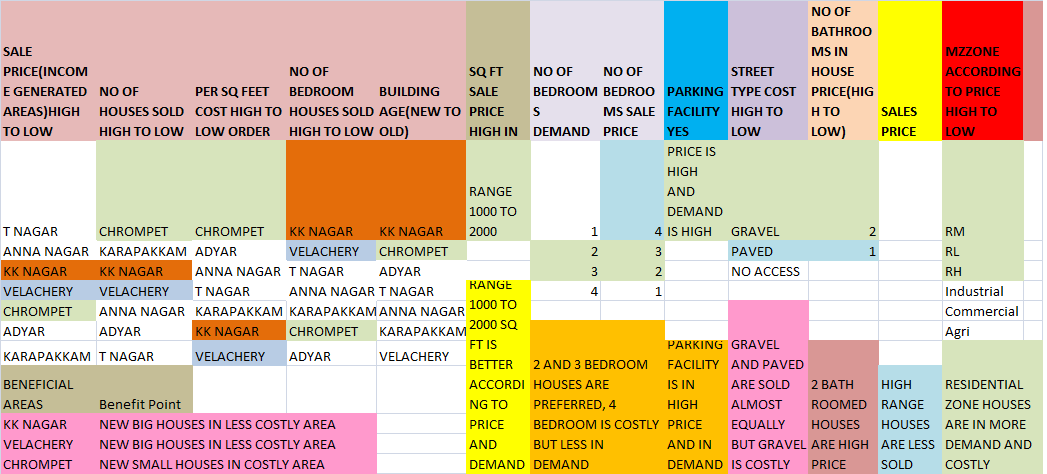

AREA: New Big Houses in less costly areas or new small houses in costly areas can fetch more money.

INT_SQFT:Peolple are buying houses more between 1000 and 2000 sqft.

N_BEDROOM: 2 and 3 bedroom houses are bought more than 4 bed room. single bedroom are bought more in count but are cheaper than 2 and 3 bedroom.

Parking Facility: Parking Facility is costlier and preferable as well.

Street: More people are ready to pay more money for Gravel and Paved streets than cheaper No Access houses.

MZZONE: Residential zone houses are costlier and in demand than Commercial,Industrial and agricultural zones.


HariChandana Chennu                                                              
D11-Data Science